# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [1]:
import os

os.chdir('/Users/meganrajan/Documents/qbio490/qbio_490_meganrajan/analysis_data')

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the cancer you'll be working with. 
4. Load it into our python environment.

In [2]:
# 1. Import cptac
import cptac

# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [3]:
# 3. Download the cancer data set -- fill in dataset!
cptac.download(dataset="pdac")

# 4. Load the cancer data
pdac = cptac.Pdac()

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.13. Please run 'pip install --upgrade cptac' to update it. (/Users/meganrajan/miniconda3/envs/qbio_490_meganrajan/lib/python3.9/threading.py, line 917)


Now, we have our object containing a bunch of data. We can use the list_data() function the data available for the cancer dataset.
<br></br>
In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the omics which we have already seen for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).
<br></br>
**Exercise 1.1** Call the list_data() function from the object to examine the different data contained in the object. Much like calling functions from a package, we can use the cancer.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [4]:
# Run the list_data() function
pdac.list_data()

Below are the dataframes contained in this dataset and their dimensions:

clinical
	238 rows
	39 columns
CNV
	140 rows
	19906 columns
derived_molecular
	140 rows
	49 columns
gene_fusion
	1212 rows
	7 columns
miRNA
	158 rows
	2416 columns
phosphoproteomics
	215 rows
	51469 columns
proteomics
	215 rows
	11662 columns
somatic_mutation
	6395 rows
	3 columns
transcriptomics
	161 rows
	28057 columns


There are 238 number of patients in this data set.

**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [5]:
protein_data = pdac.get_proteomics() # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [6]:
# import packages here
import pandas as pd
import numpy as np

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.
<br></br>
**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [31]:
## Explore the data frame here and answer questions
print(protein_data.axes) # There are 11662 columns
print(protein_data.index)
print(protein_data.columns)

# There are 215 patients, and 11662 proteins

[Index(['C3L-00017', 'C3L-00102', 'C3L-00189', 'C3L-00277', 'C3L-00401',
       'C3L-00589', 'C3L-00598', 'C3L-00599', 'C3L-00622', 'C3L-00625',
       ...
       'C3N-03069.N', 'C3N-03211.N', 'C3N-03426.N', 'C3N-03440.N',
       'C3N-03780.N', 'C3N-03839.N', 'C3N-03840.N', 'C3N-03884.N',
       'C3N-04119.N', 'C3N-04282.N'],
      dtype='object', name='Patient_ID', length=215), Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AADAC', 'AADAT',
       ...
       'ZSWIM9', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=11662)]
Index(['C3L-00017', 'C3L-00102', 'C3L-00189', 'C3L-00277', 'C3L-00401',
       'C3L-00589', 'C3L-00598', 'C3L-00599', 'C3L-00622', 'C3L-00625',
       ...
       'C3N-03069.N', 'C3N-03211.N', 'C3N-03426.N', 'C3N-03440.N',
       'C3N-03780.N', 'C3N-03839.N', 'C3N-03840.N', 'C3N-03884.N',
       'C3N-04119.N', 'C3N-04282.N'],
      dtype='object', name='P

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [37]:
# Correct usage of .loc to get the 'A1BG' protein values for all patients
protein_expression_A1BG = protein_data.loc[:, 'A1BG']
 # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
# ## Answer question in comment form here
# Greater than 0 = higher relative expression, indicating that the protein's expression is increased compared to the reference level. Ex. 1.5
# Less than 0 = lower relative expression, suggesting that the protein's expression is decreased compared to the reference level. Ex. -1.5

**Exericse 2.4**

Print the relative fold change of 5th patient in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [ ]:
## write code here
foldchange = protein_data.loc[protein_data.index[5], 'TP53']
foldchange
# this patient has higher protein levels than the reference

### Using Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [10]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

,nums
0,0
1,1
2,2
3,3
4,4
5,5


In [11]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

,nums
0,False
1,True
2,False
3,True
4,False
5,True


In [12]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

,nums,boolean_vector
0,0,False
1,1,True
2,2,False
3,3,True
4,4,False
5,5,True


In [13]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

,nums,boolean_vector,parity
0,0,False,Even
1,1,True,Odd
2,2,False,Even
3,3,True,Odd
4,4,False,Even
5,5,True,Odd


**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [14]:
# write code here
high_mask = protein_data['TP53'] >= 1
high_TP53 = protein_data[high_mask]
# print(high_TP53.index) # There are 117 patients with high TP53 expression, columns represents proteins

high_TP53['ARF1'].mean()

27.59951810756375

## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the object. The function name is very similar in syntax to the get_proteomics() function from before!

In [16]:
rna_data = pdac.get_transcriptomics()
clinical_data = pdac.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [18]:
# explore the data frames using shape, axes, and other functions we've gone over.
rna_data.axes
clinical_data.axes

[Index(['C3L-00017', 'C3L-00102', 'C3L-00189', 'C3L-00277', 'C3L-00401',
        'C3L-00589', 'C3L-00598', 'C3L-00599', 'C3L-00622', 'C3L-00625',
        ...
        'C3N-03211.N', 'C3N-03426.N', 'C3N-03440.N', 'C3N-03780.N',
        'C3N-03839.N', 'C3N-03840.N', 'C3N-03884.N', 'C3N-04119.N',
        'C3N-04282.N', 'C3N-04283.N'],
       dtype='object', name='Patient_ID', length=238),
 Index(['tumor_included_for_the_study', 'normal_included_for_the_study',
        'histology_diagnosis', 'age', 'sex', 'race', 'participant_country',
        'tumor_site', 'tumor_focality', 'tumor_size_cm', 'tumor_necrosis',
        'lymph_vascular_invasion', 'perineural_invasion',
        'number_of_lymph_nodes_examined',
        'number_of_lymph_nodes_positive_for_tumor',
        'pathologic_staging_regional_lymph_nodes_pn',
        'pathologic_staging_primary_tumor_pt',
        'pathologic_staging_distant_metastasis_pm',
        'clinical_staging_distant_metastasis_cm', 'residual_tumor',
        'tumor_

The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
<br></br>
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [23]:
# write code here

age_mask = clinical_data['age'] > 50

# 2. Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.
masked_clinical = clinical_data[age_mask]

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [41]:

name_intersects = [
    np.intersect1d(protein_data.index, rna_data.index), # Protein/RNA intersection
    np.intersect1d(protein_data.index, clinical_data.index), # Protein/Clinical intersection
    np.intersect1d(rna_data.index, clinical_data.index) # RNA/Clinical intersection
]

# Print the lengths
for i, intersection in enumerate(name_intersects):
    print(f"The length of intersection {i} is {len(intersection)}")

all_three_levels = np.intersect1d(name_intersects[0], name_intersects[2])


The length of intersection 0 is 161
The length of intersection 1 is 215
The length of intersection 2 is 161


## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [42]:
# write code here
clinical_data.head()

Name,tumor_included_for_the_study,normal_included_for_the_study,histology_diagnosis,age,sex,race,participant_country,tumor_site,tumor_focality,tumor_size_cm,...,Stromal_fraction,Non_neoplastic_duct,Fat_fraction,Inflammation_fraction,Muscle_fraction,follow_up_days,vital_status,is_this_patient_lost_to_follow_up,cause_of_death,Sample_Tumor_Normal
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00017,yes,no,PDAC,69.0,Male,White,United States,head,Unifocal,4.5,...,73,0,0,5,0,426.0,Living,Yes,na,Tumor
C3L-00102,yes,yes,PDAC,42.0,Male,White,United States,head,Unifocal,3.0,...,60,1,4,7,0,249.0,Deceased,No,pancreatic carcinoma,Tumor
C3L-00189,yes,yes,PDAC,68.0,Female,NaN,Canada,head,Unifocal,2.7,...,75;55;53,2;1;0,0;6;0,7;30;25,0;0;0,1035.0,Deceased,No,pancreatic carcinoma,Tumor
C3L-00277,yes,yes,PDAC,69.0,Male,White,Other,tail,Unifocal,5.0,...,55,0,0,5,0,610.0,Deceased,Yes,pancreatic carcinoma,Tumor
C3L-00401,yes,yes,PDAC,62.0,Female,NaN,Canada,body,Unifocal,2.8,...,35;30;32,3;10;10,0;0;0,10;13;5,0;0;0,1228.0,Living,No,na,Tumor


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [48]:
# convert ages here!
clinical_data["Age.in.Month"] = clinical_data["age"] * 12

# Now, to verify the conversion, use head() to display the top rows
clinical_data.head()


Name,tumor_included_for_the_study,normal_included_for_the_study,histology_diagnosis,age,sex,race,participant_country,tumor_site,tumor_focality,tumor_size_cm,...,Non_neoplastic_duct,Fat_fraction,Inflammation_fraction,Muscle_fraction,follow_up_days,vital_status,is_this_patient_lost_to_follow_up,cause_of_death,Sample_Tumor_Normal,Age.in.Month
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00017,yes,no,PDAC,69.0,Male,White,United States,head,Unifocal,4.5,...,0,0,5,0,426.0,Living,Yes,na,Tumor,828.0
C3L-00102,yes,yes,PDAC,42.0,Male,White,United States,head,Unifocal,3.0,...,1,4,7,0,249.0,Deceased,No,pancreatic carcinoma,Tumor,504.0
C3L-00189,yes,yes,PDAC,68.0,Female,NaN,Canada,head,Unifocal,2.7,...,2;1;0,0;6;0,7;30;25,0;0;0,1035.0,Deceased,No,pancreatic carcinoma,Tumor,816.0
C3L-00277,yes,yes,PDAC,69.0,Male,White,Other,tail,Unifocal,5.0,...,0,0,5,0,610.0,Deceased,Yes,pancreatic carcinoma,Tumor,828.0
C3L-00401,yes,yes,PDAC,62.0,Female,NaN,Canada,body,Unifocal,2.8,...,3;10;10,0;0;0,10;13;5,0;0;0,1228.0,Living,No,na,Tumor,744.0


There may be control (non-cancer) tissue samples in some datasets. Let's determine whether we need to account for this in our dataset this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [54]:
# Get the levels of the Sample_Tumor_Normal column with unique()
print(clinical_data["Sample_Tumor_Normal"].unique())

['Tumor' nan]


__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time, seaborn is sns).
   2. Create an age_category column in clinical_data. Define "Young" as under the median age, and "Old" as the median age and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for soome of these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to remove any patients with NaN values in "Stage".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Use the skeleton code to draw the barplot. Do your numbers make sense?

In [92]:
# 1. Import libraries here

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create the age_category column in clinical_data
print(clinical_data.head())
median_age = clinical_data['age'].median()
clinical_data['age_category'] = np.where(clinical_data['age'] < median_age, 'Young', 'Old')

# 3. Filter our NaN
clinical_data = clinical_data[~clinical_data['tumor_stage_pathological'].isna()]


Name       tumor_included_for_the_study normal_included_for_the_study  \
Patient_ID                                                              
C3L-00017                           yes                            no   
C3L-00102                           yes                           yes   
C3L-00189                           yes                           yes   
C3L-00277                           yes                           yes   
C3L-00401                           yes                           yes   

Name       histology_diagnosis   age     sex   race participant_country  \
Patient_ID                                                                
C3L-00017                 PDAC  69.0    Male  White       United States   
C3L-00102                 PDAC  42.0    Male  White       United States   
C3L-00189                 PDAC  68.0  Female    NaN              Canada   
C3L-00277                 PDAC  69.0    Male  White               Other   
C3L-00401                 PDAC  62.0  

['Stage IA' 'Stage IB' 'Stage IIA' 'Stage IIB' 'Stage III' 'Stage IV']
Old
Stage IA: 5
Stage IB: 10
Stage IIA: 7
Stage IIB: 26
Stage III: 16
Stage IV: 4
Young
Stage IA: 2
Stage IB: 6
Stage IIA: 1
Stage IIB: 26
Stage III: 26
Stage IV: 5


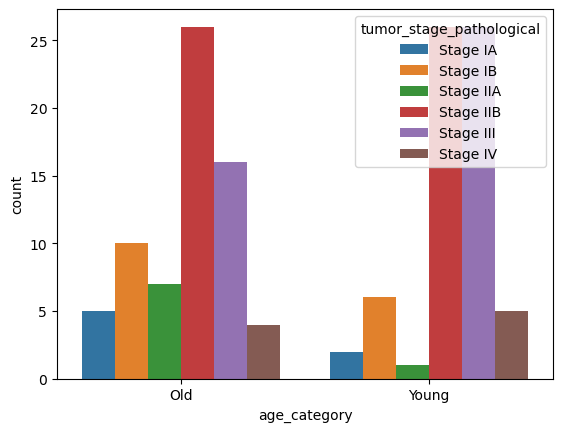

In [101]:

## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:, 'tumor_stage_pathological'])
print(stage_categories)
assert np.all(np.sort(stage_categories) == np.sort(np.unique(clinical_data['tumor_stage_pathological']).tolist()))
# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    for cancer_cat in stage_categories:
        # 1. create a subset of the data frame with the old/young patients
        subset = clinical_data[(clinical_data['age_category'] == age_cat) & (clinical_data['tumor_stage_pathological'] == cancer_cat)]
        # 2. count the number of patients with the stage of cancer and print
        count = subset.shape[0]
        print(f"{cancer_cat}: {count}")
      
# 5. Create a barplot to compare your results
sns.countplot(
    x = "age_category",
    hue = "tumor_stage_pathological",
    hue_order = stage_categories,
    data = clinical_data
)

plt.show()

## (5) Plotting Proteomic Data

Let's explore how the proteomic expression of a gene differs between young and old patients.

**Exercise 5.1** Plot the expression data of a chosen protein stratified between patients older and younger than the median age.

In [146]:
young_mask = clinical_data[clinical_data["age_category"] == 'Young'] # look at the columns of the clinical data to see what column to get age information
old_mask = clinical_data[clinical_data["age_category"] == 'Old']


young = (protein_data.loc[young_mask.index, 'TP53']).dropna()
old = (protein_data.loc[old_mask.index, 'TP53']).dropna()

data = [old.values, young.values] # our boxplot function will require an array (or an array of arrays)
data

[array([22.24364522, 22.20780208, 21.74022571, 22.25403217, 21.95738155,
        22.50213638, 22.54950207, 21.75489293, 21.93268966, 23.29120538,
        21.80011264, 21.98361096, 22.03213927, 23.23714676, 22.23982492,
        20.54534232, 21.49017548, 23.21602073, 22.05961554, 21.85745891,
        21.39360697, 22.89891084, 22.03561983, 22.65509724, 22.02223584,
        22.8566564 , 21.71733835, 21.84394429, 21.88819535, 21.53889841,
        21.64315764, 21.71353323, 22.25192284, 22.25354977, 21.86483569,
        22.38550832, 22.35682987, 21.72428943, 22.69457148]),
 array([22.36756843, 22.43948584, 22.90936845, 22.29743017, 21.5964152 ,
        22.56057901, 22.40410749, 20.63901513, 22.79607552, 23.44207823,
        24.1079638 , 22.4967791 , 21.89126612, 21.66572994, 22.25465495,
        21.5761327 , 22.6903451 , 22.21015671, 21.29822828, 21.85899297,
        22.91659643, 21.77547277, 22.0491657 , 22.32984122, 21.49905848,
        24.26283549, 21.19280817, 21.99052344, 23.5977117 , 21

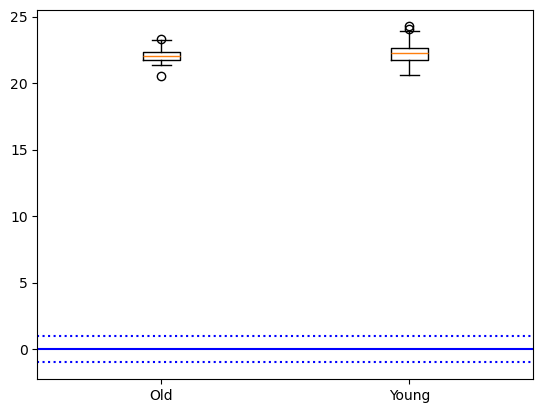

In [118]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')

bp = ax.boxplot([old.values, young.values])

# Set x-ticks labels for the boxplot
plt.xticks([1, 2], ["Old", "Young"])


plt.show()

**Exercise 5.2** Why do you think we added lines at -1, 0, and 1? What do these values represent in terms of log2FoldChange?

In [ ]:
# answer in a comment here

## (6) SciPy
Another question to ask is if the levels of RNA expression correlate with protein expression. While we would expect for there to be a 1:1 relationship between RNA and protein (according to the central dogma), as you will see, this is not what we oftentimes observe.

In [81]:
from scipy import stats # we are using the stats package in particular

The first thing we need to do is to identify which patients and genes are shared between the transcriptomic and proteomic data sets.

For some cancer, patients doesn't have clinical or transcriptomic data in CPTAC. We need to use intersect1d() to fix this. We also need to use intersect1d() to determine which genes are shared.

**Exercise 6.1** To make sure the data frames match:

1. Identify patients that are shared between transcriptomic and proteomics data (hint: use intersect1d()). 
2. Identify the names of the genes that are shared between the two datasets (hint: use intersect1d()). Is this data the row or column names?
3. Create the rna_shared and prot_shared data frames; ie dataframes with only genes and patients that are shared between rna and protein data. (Hint: how can we access rows/columns by name?).

In [128]:
# Assuming transcriptomic_data and proteomic_data are defined with Patient_ID as index and genes as columns

# 1. Identify the patients shared between RNA and protein data.
shared_patients_prot = np.intersect1d(rna_data.index, rna_data.index)

# 2. Identify the genes (RNA, protein) shared between the two data sets
# Assuming that the genes are the columns of the data frames
shared_rna_prot = np.intersect1d(rna_data.columns, rna_data.columns)

# 3. Create the two data frames
# DataFrames with only genes and patients that are shared between RNA and protein data
rna_shared = rna_data.loc[shared_patients_prot, shared_rna_prot]
prot_shared = rna_data.loc[shared_patients_prot, shared_rna_prot]


Now, we can see how correlated the RNA and protein levels are. We'll use Spearman correlation from the stats library, which is spearmanr().

**Exercise 6.2** Choose a gene and get the Spearman correlation of the rna to protein of that gene.

In [130]:
# we need the nan_policy="omit" to throw out NaN values
from scipy.stats import spearmanr

gene_name = 'ARF1'
corr, pval = spearmanr(rna_shared[gene_name], prot_shared[gene_name], nan_policy='omit')

print(f"The correlation of {gene_name} is {round(corr, 3)} (p = {round(pval, 10)}).")

The correlation of ARF1 is 1.0 (p = 0.0).


**Exercise 6.3** What is your gene's Spearman correlation? What does that mean mathematically? What could this represent biologically? Look into the literature to see if it corroborates this idea.

A Spearman correlation of 1.0 indicates a perfect positive monotonic relationship, suggesting that as RNA expression levels increase, protein expression levels also increase in a consistent manner for the gene TP53, which could imply a direct correlation between gene expression and protein levels for this gene.

## (7) Heatmaps
**Exercise 7.1** A problem arises if we want to compare many correlations. Heatmaps are useful for visualizing a large number of comparisons. To make a heatmap, we'll use the heatmap() function from seaborn. Let's do the following:

1. Set up our data frame to hold all comparisons. All you need to do is to access the first 20 gene names.
2. Calculate the correlations for the first 20 genes (just to save time). You'll need to use two for loops.
3. Call heatmap() -- this is filled in for you!
4. Interpret the data. There is a "light" diagonal along the heatmap from the top-left to bottom-right. Is this expected? Why or why not?

In [159]:
import seaborn as sns
ncomparisons = 20 # define this variable in case we want to change the number of correlations to test
                  # this makes it less likely you'll forget to change a number, e.g. in the data frame shape
gene_names = FILL IN HERE # get the first ncomparisons gene names


# Don't worry about this code
# It's good practice to declare your data frame beforehand (it's much faster than appending to a list)
# We fill everything in with 0 just as a placeholder
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

# 2. fill in the data frame!
for g1 in gene_names:
    for g2 in gene_names:
        # calculate the correlations between protein and RNA
        # then, use .loc[] to store the correlation in corr_df
        FILL IN HERE

# 3. create the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.show()

# 4. interpret!

SyntaxError: invalid syntax (2565069547.py, line 3)

## (8) More with Seaborn
seaborn is a nice package which works well with matplotlib and makes prettier plots with more control over the figure.

Here's how you make a scatter plot with seaborn, for example:

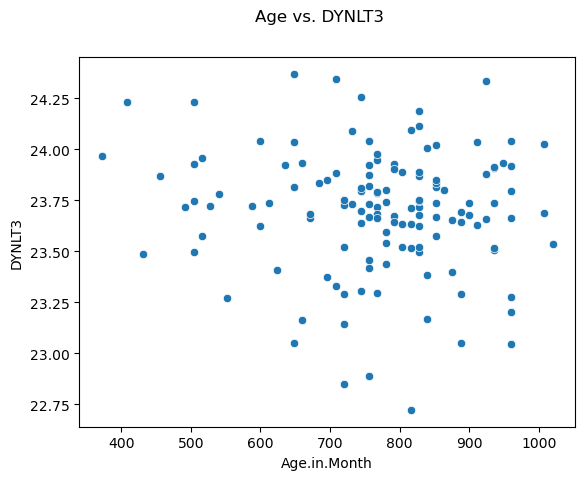

In [158]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

plt.show()

**Exercise 8.1** Update the above plot to:

1. Have age in years instead of months.
2. Color patients based on gender (or another clinical variable of your choosing)
3. Have a side-by-side second plot with a different protein of your choosing

In [ ]:
# create plot here

## (9) Saving Plots
Remember, to save a plot, we can call plt.savefig() instead of the plt.show().

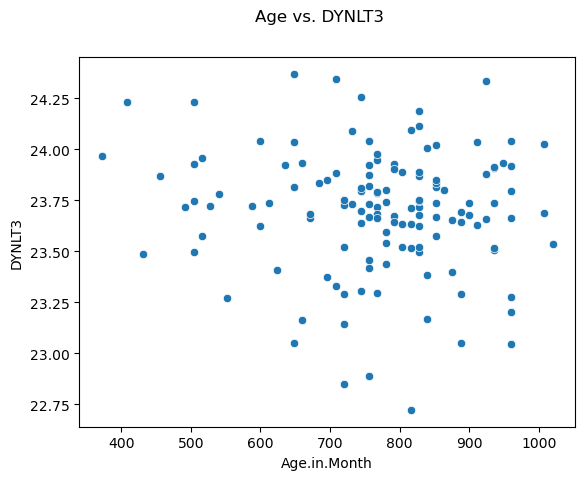

In [157]:
fig, ax = plt.subplots()

sns.scatterplot( # x-axis
    x = clinical_data.loc[:, "Age.in.Month"],
    y = protein_data.loc[:, "DYNLT3"],# y-axis
    legend = "full",  # show the legend
    ax = ax  # necessary for when plotting more than 1 subplot
)

fig.suptitle('Age vs. DYNLT3')  # set title

# age_scatter.png is a relative path so check your working directory before running it
plt.savefig('age_scatter.png', bbox_inches='tight')

# Exercises
Only this section will be graded!
## 1. Drawing Connections
1. Choose a clinical variable and segment the cohort into two groups. 
2. Find out what the 5 most differentially expressed genes are (we aren't going to do this in a sophisticated way like DESeq, instead just take the mean expression of every single gene within a group and find the gene which has the greatest difference in mean between the two groups)
3. Create two scatter plots, side by side, each with one group. Within the scatter plots, plot RNA expression versus protein expression for each of the genes in a different color.
4. Add appropriate legend, title, and labels.

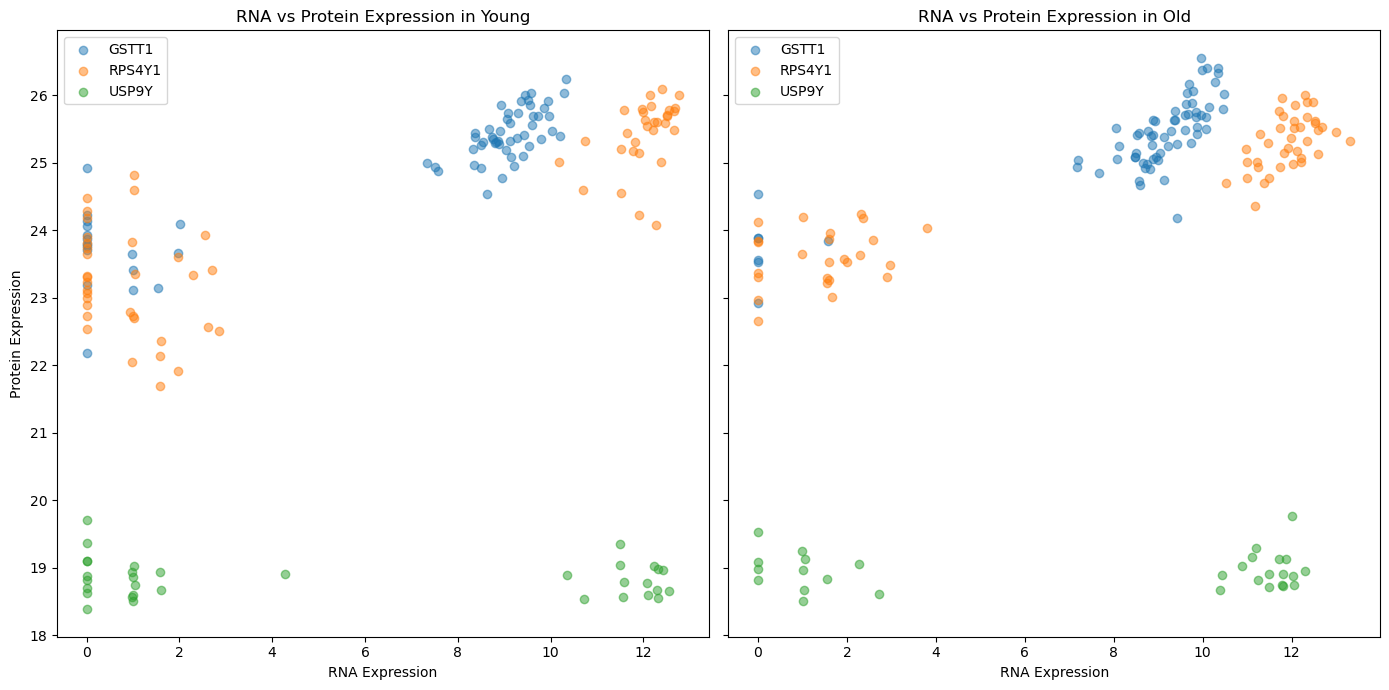

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# segment based on old and young
# finding the 5 most differentially expressed genes between 'Young' and 'Old'
gene_mean_diff = (rna_data.loc[young_mask.index].mean() - rna_data.loc[old_mask.index].mean()).abs()
top_5_genes = gene_mean_diff.nlargest(5).index.tolist()

# create scatter plots for RNA vs protein expression of the top 5 genes
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# checking that the genes exist in both dataframes and that the masks are correct
for gene in top_5_genes:
    if gene in rna_data.columns and gene in protein_data.columns:
        axs[0].scatter(rna_data.loc[young_mask.index, gene],
                       protein_data.loc[young_mask.index, gene], label=gene, alpha=0.5)
    
        axs[1].scatter(rna_data.loc[old_mask.index, gene],
                       protein_data.loc[old_mask.index, gene], label=gene, alpha=0.5)

# 4. Add legends, titles, and labels
axs[0].set_title('RNA vs Protein Expression in Young')
axs[0].set_xlabel('RNA Expression')
axs[0].set_ylabel('Protein Expression')
axs[0].legend()

axs[1].set_title('RNA vs Protein Expression in Old')
axs[1].set_xlabel('RNA Expression')
axs[1].legend()

plt.tight_layout()
plt.show()


## 2. Interpretation Skills
This section is short-answer based written responses. Please respond in 2-3 sentences to each question below for full credit.
1. What do the numbers within the protein and transcriptomics DataFrames represent? Why do we represent them this way?
2. Why are there fewer columns in the protein DataFrame than the transcriptomics one?
3. Explain how the central dogma may be broken in between DNA -> RNA -> Proteins and how this might affect our proteomics data.
4. Why is proteomics data relatively scarce compared to sequencing data?
5. Should we ever expect protein expression to be 0 in a tumor sample?
6. What are protein domains and how do they relate to the role of a protein?


# Answers to Part 2
1. The numbers within the protein and transcriptomics dataframes represent the expression levels of proteins and RNA transcripts, respectively. They are usually represented as relative abundance or normalized read counts to allow comparison across samples. This representation is crucial for identifying differentially expressed genes and understanding the biological processes affected by changes in gene and protein expression.

2. There are fewer columns in the protein DataFrame than the transcriptomics one because not all RNA transcripts are translated into proteins, and protein abundance is typically measured for a more selective set of known proteins of interest. Additionally, the detection techniques for proteins (e.g., mass spectrometry) have limitations and may not cover as many proteins as transcriptomics technologies (e.g., RNA-Seq) cover transcripts.

3. The central dogma may be broken in various ways, such as through post-transcriptional modifications, alternative splicing, or post-translational modifications that affect protein structure and function. These processes can result in multiple protein isoforms from a single gene or modify the protein after translation, which might not directly correlate with RNA expression levels, thereby affecting our proteomics data.

4. Proteomics data is relatively scarce compared to sequencing data because proteomics technologies, like mass spectrometry, are generally more complex, expensive, and require higher sample quality. Additionally, proteome analysis is technically challenging due to the wide range of protein abundances and the complexity of protein modifications.

5. Protein expression might be very low or undetectable in a tumor sample for several reasons, such as the gene not being expressed in the specific tissue type, gene silencing mechanisms at play (e.g., methylation), the protein being degraded, or the limitations of the detection methods used.

6. Protein domains are distinct functional and/or structural units within a protein, typically associated with a particular role, such as binding DNA, RNA, or other proteins. They are critical to the role of a protein because the combination of domains determines the overall function and interaction capabilities of the protein within the cell.

## 3. Challenge Exercise - Incorporating Genomics
This exercise is optional and is worth extra credit up to 5 points. The combined extra credit between challenge exercises will cap out at 5 points total.
<br></br>
We can get somatic mutation data for cptac patients the same way we get proteomics, transcriptomical, or clinical. Let's explore some aspects of it.
1. Save the cancer somatic mutation data to `mutation_data`
2. Determine the top 10 most commonly mutated genes within the dataset.
3. Determine what percent of patients have a mutation in at least one of those genes.
4. Create a bar plot that shows percent percent of patients that have exactly 0-10 out of 10 of those mutations. Name axes and titles appropriately.